## Tasca S7 T01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

**Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.**

#### Import dataset

In [2]:
df = pd.read_csv("dataset/wineData.txt", index_col = None, header = None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
112,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
160,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
100,2,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710


In [3]:
df.columns = ["Class","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", 
              "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

In [4]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Relevant Information:** These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

**Number of Instances:** 
   * **class 1:** 59
   * **class 2:** 71
   * **class 3:** 48

**Number of Attributes:** 13 continuous attributes 

**Attribute Information:**

    1. Alcohol
    2. Malic acid
    3. Ash
    4. Alcalinity of ash
    5. Magnesium
    6. Total phenols
    7. Flavanoids
    8. Nonflavanoid phenols
    9. Proanthocyanins
    10. Color intensity
    11. Hue
    12. OD280/OD315 of diluted wines
    13. Proline

#### Primera exploración gráfica y descriptiva de los atributos del dataset

Estudiamos el conjunto a nivel descriptivo y vemos la correlación de las diferentes variables.

In [5]:
data1 = df.describe().transpose()
data1[["mean", "std", "min", "max"]]

,mean,std,min,max
Class,1.938202,0.775035,1.00,3.00
Alcohol,13.000618,0.811827,11.03,14.83
Malic acid,2.336348,1.117146,0.74,5.80
Ash,2.366517,0.274344,1.36,3.23
Alcalinity of ash,19.494944,3.339564,10.60,30.00
Magnesium,99.741573,14.282484,70.00,162.00
Total phenols,2.295112,0.625851,0.98,3.88
Flavanoids,2.029270,0.998859,0.34,5.08
Nonflavanoid phenols,0.361854,0.124453,0.13,0.66
Proanthocyanins,1.590899,0.572359,0.41,3.58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [7]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

Text(0.5, 0.98, 'Distribución de las Variables Numéricas')

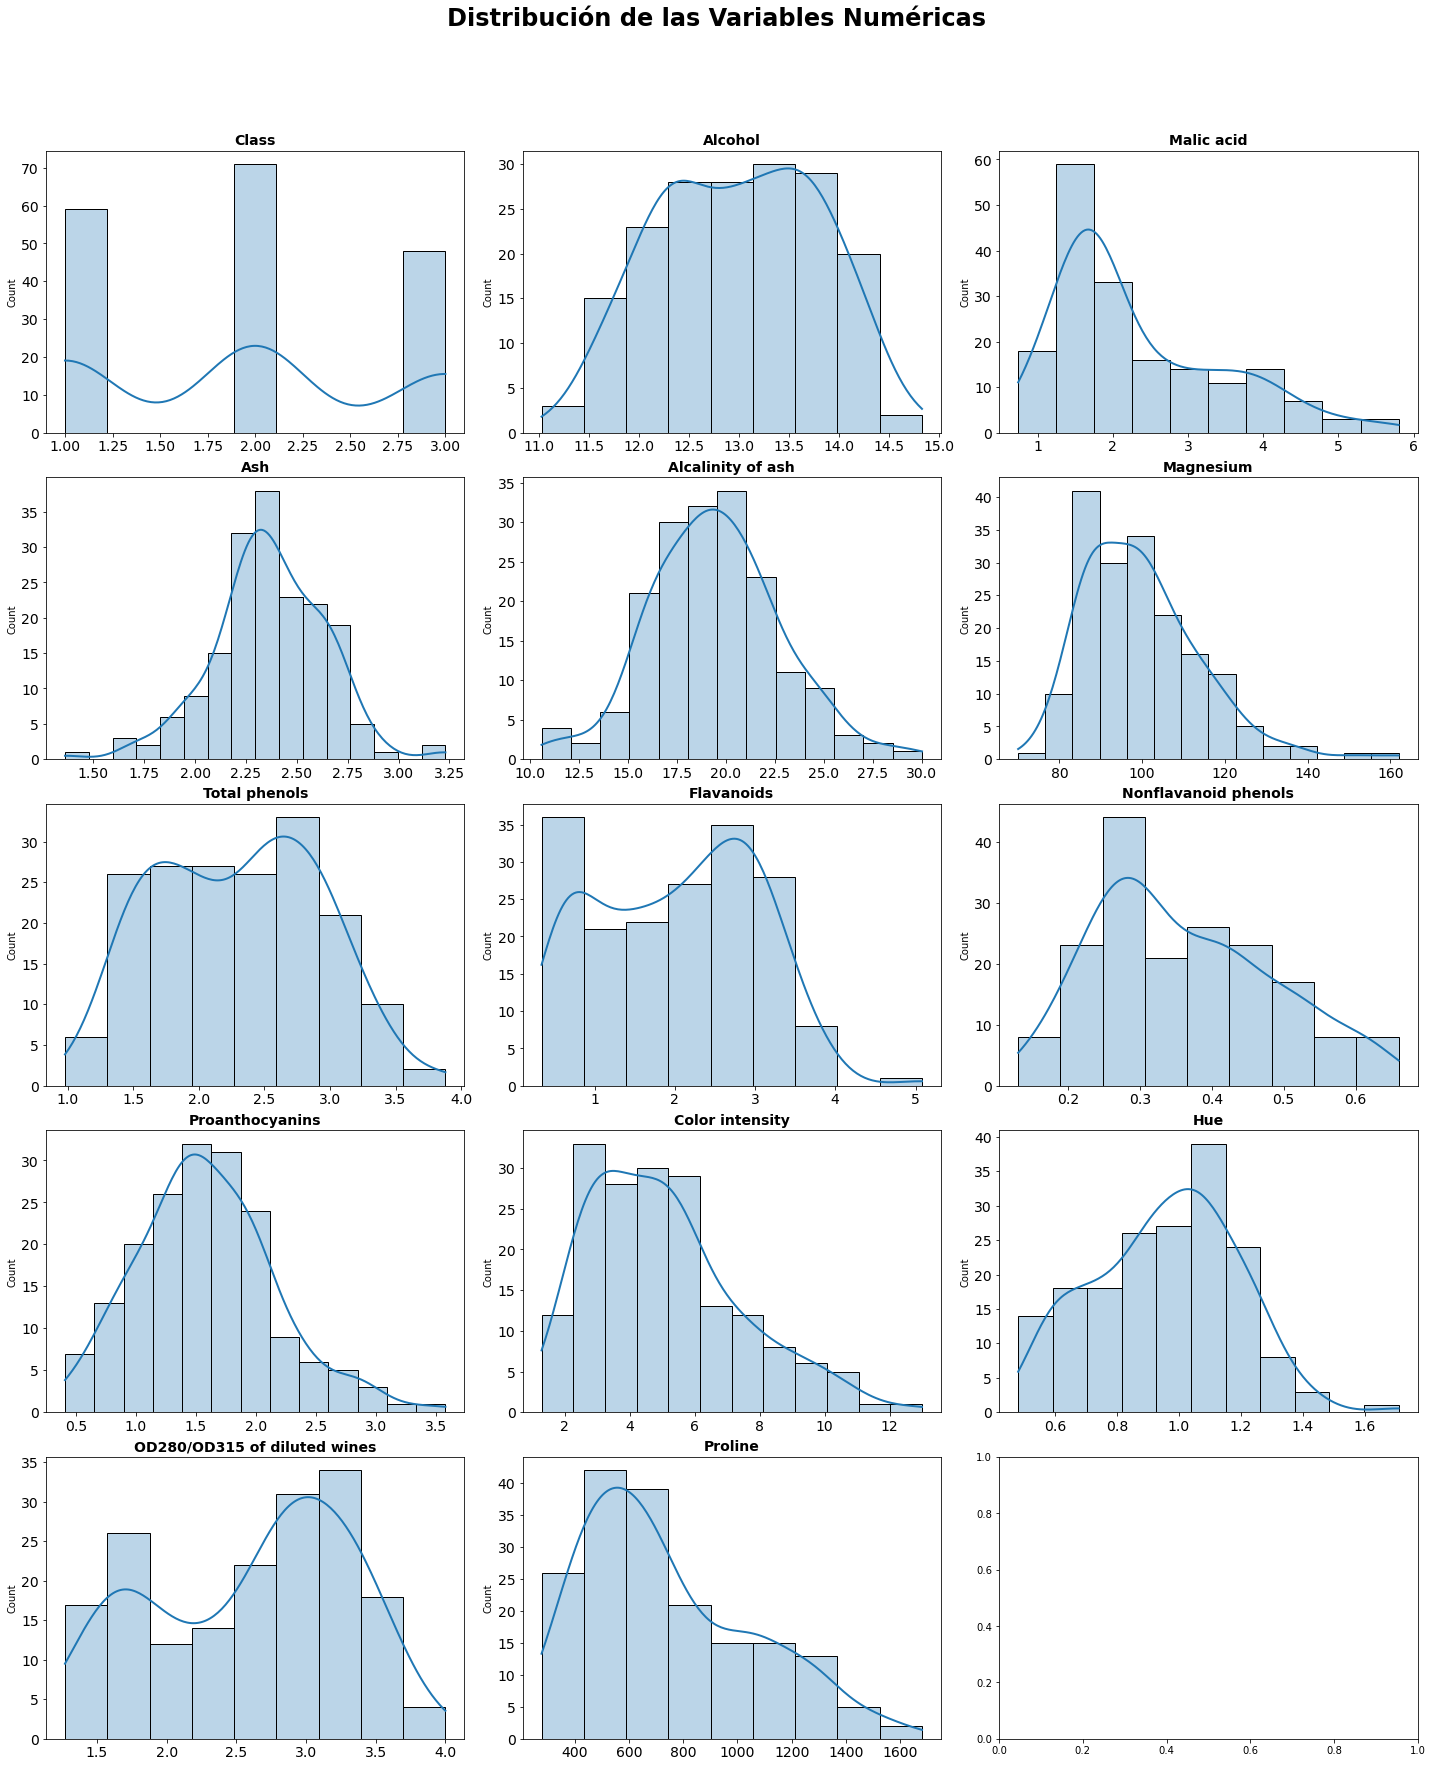

In [8]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(20, 25))
axes = axes.flat
#columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 
            'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
            'Proline']

for i, colum in enumerate(columnas):
    sns.histplot(data = df, x= colum, stat= "count", kde = True,line_kws= {'linewidth': 2}, alpha   = 0.3, ax = axes[i])
    axes[i].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i].tick_params(labelsize = 14)
    axes[i].set_xlabel("")
       
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las Variables Numéricas', fontsize = 24, fontweight = "bold")

#### Matriz de correlación

<AxesSubplot:>

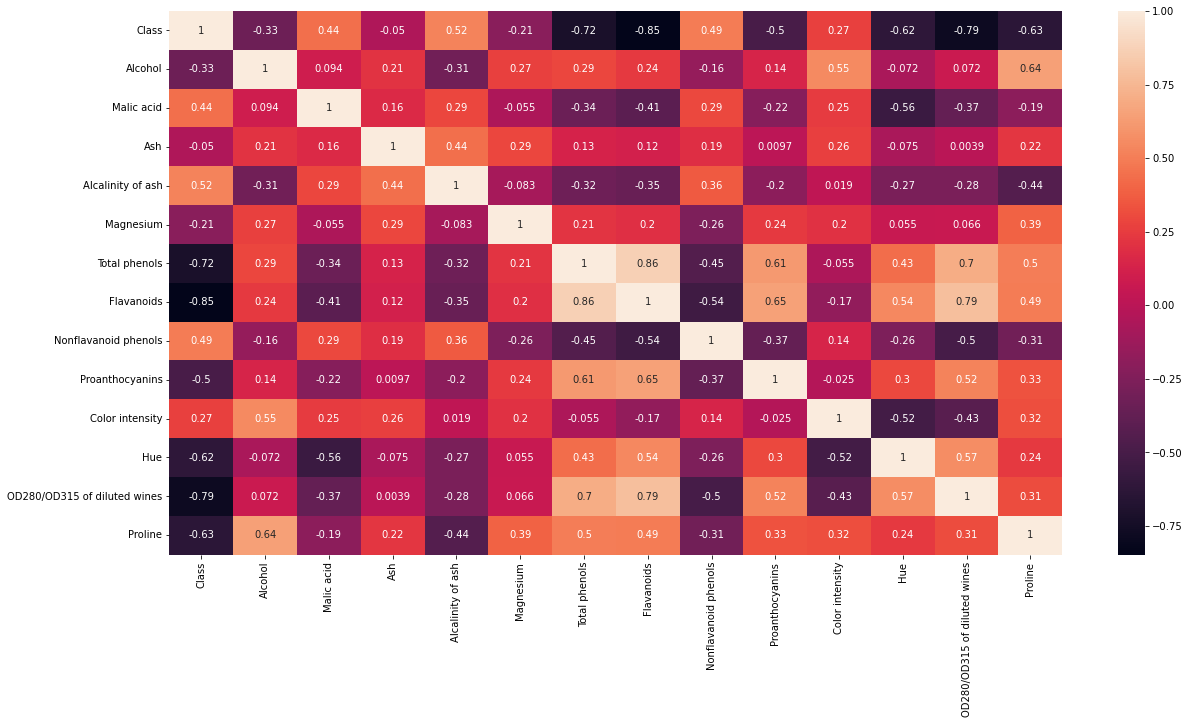

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

En este primer análisis, nos permitiremos el tiempo de analizar nuestra base datos en relación a la columna objetivo **CLASS**, tal y como veremos más adelante.  

Si prestamos atención podemos ver tres variables que se relacionan directamente, con valores superirores a 0.7:
* **Total phenols**, elemento que influye en la coloración del vino.
* **Flavanoids**, pigmentos amarillos que aumentan a envejecer el vino blanco
* **OD280/OD315**, concentración de proteínas en vinos diluidos (resulta un sistema de clasificación utilizando su coloración). 


No hay datos faltantes, todos los valores son numéricos y los datos están distribuidos en 3 clases de la siguiente manera:

In [10]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

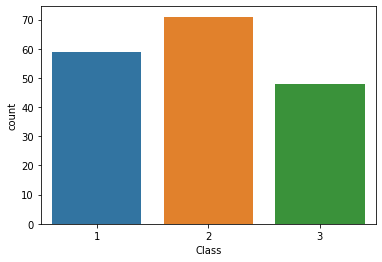

In [11]:
sns.countplot(x=df.Class)

## Exercici 1

*Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.*

### 1. Test/Train

In [12]:
# split into inputs and outputs
X = df.drop(['Class'], axis=1) #features
y = df['Class'] #target

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


### 2. Modelo

Aplicamos dos modelos de clasificación seleccionados de forma aleatoria

#### 2.1. Modelo de clasificación: K-Nearest Neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred_kn = kn.predict(X_test)
y_pred_kn[0:5]

array([3, 1, 3, 1, 2], dtype=int64)

#### 2.2. Modelo de clasificación: Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)
y_pred_dt[0:5]

array([1, 1, 3, 1, 2], dtype=int64)

### 3. Comparación de resultados obtenidos

In [17]:
data2 = {'test': y_test,
         'kn': y_pred_kn,
         'dt': y_pred_dt,
        }

plotdata = pd.DataFrame(data2)
plotdata.describe().round(1)

,test,kn,dt
count,36.0,36.0,36.0
mean,1.8,1.8,1.8
std,0.8,0.8,0.7
min,1.0,1.0,1.0
25%,1.0,1.0,1.0
50%,2.0,2.0,2.0
75%,2.0,2.0,2.0
max,3.0,3.0,3.0


Como se puede observar en la tabla el clasificador se encuentra bien posicionado respecto a los demás, lo que significa que los resultados de eficiencia son buenos

## Exercici 2

*Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.*

### 1. Evaluación

#### 1.1. Accuracy

In [18]:
from sklearn import metrics
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
acc_kn = metrics.accuracy_score(y_test, y_pred_kn)

In [19]:
metrics = pd.DataFrame(data = [('K-Nearest Neighbors', acc_kn), 
                              ('Decision Tree', acc_dt)],
                             columns = ['Model', 'Accuracy'])

metrics

,Model,Accuracy
0,K-Nearest Neighbors,0.722222
1,Decision Tree,0.944444


En una primera evaluación, los resultados muestran una buena ejecución de los agrupadores. Apreciamos una ventaja importante del modelo *Decision Tree*, en la cual obtenemos valores cercanos al 95%.

#### 1.2. F1 Score

In [20]:
from sklearn.metrics import f1_score
f1_kn = f1_score(y_test, y_pred_kn, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

In [21]:
f1_metrics = [f1_kn, f1_dt]
metrics['F1-score'] = f1_metrics

metrics

,Model,Accuracy,F1-score
0,K-Nearest Neighbors,0.722222,0.672619
1,Decision Tree,0.944444,0.942474


En esta segunda evaluación hemos seleccionado el metodo *F1-Score*, el cual representan el porcentaje (%) de predicciones positivas correctas.

Los dos resultados obtenidos son muy similares al de *accuracy* de cada modelo.
Se observa que el valor de *F1* en el modelo ***"K-Nearest Neighbors"*** disminuye levemente en comparación con el *accuracy*, el modelo ***Decision Tree*** sigue siendo mejor.

#### 1.3. Matriz de confusión

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
cf_matrix_kn = confusion_matrix(y_test, y_pred_kn)

#### 1.3.1. Matriz de confusión: Decision Tree

[Text(0.5, 1.0, 'Confusion matrix for dt')]

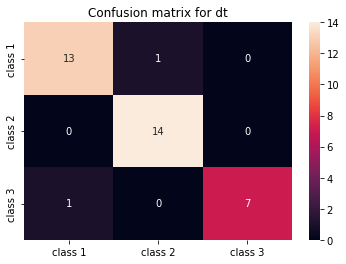

In [23]:
classes_names = ['class 1','class 2','class 3']
sns.heatmap(cf_matrix_dt, xticklabels=classes_names, yticklabels=classes_names, annot=True).set(title='Confusion matrix for dt')

In [24]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



#### 1.3.2. Matriz de confusión: K-Nearest Neighbors

[Text(0.5, 1.0, 'Confusion matrix for kn')]

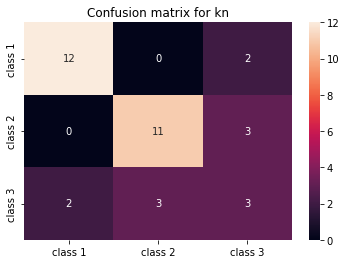

In [25]:
sns.heatmap(cf_matrix_kn, xticklabels=classes_names, yticklabels=classes_names, annot=True).set(title='Confusion matrix for kn')

In [26]:
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.79      0.79      0.79        14
           3       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



## Exercici 3

*Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.*

### 1. Mejora parámetros en los modelos

#### 1.1.1. Mejora parámetros en modelos: K-Nearest Neighbors

In [27]:
kn = KNeighborsClassifier()

param = {'n_neighbors': [3,5,10],'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute') , 'weights': ('uniform', 'distance')},
rsearch = RandomizedSearchCV(estimator=kn,
                             param_distributions=param, cv=5,
                             n_iter=10, random_state=42, scoring='f1_macro')
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.7128899539883335
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'kd_tree'}


In [28]:
kn_bp = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', weights='distance').fit(X_train,y_train)

#Predict the response for test dataset
y_pred_kn_bp = kn_bp.predict(X_test)

In [29]:
from sklearn import metrics
acc_kn2 = metrics.accuracy_score(y_test, y_pred_kn_bp)
f1_kn2 = f1_score(y_test, y_pred_kn_bp, average='macro')

#### 1.1.2. Tabla comparativa

In [30]:
metrics_kn = pd.DataFrame( data = [('K-Nearest Neighbors', acc_kn, f1_kn), 
                                  ('K-Nearest Neighbors best params', acc_kn2, f1_kn2)],
                         columns = ['Model', 'Accuracy', 'F1-score'])

In [31]:
metrics_kn

,Model,Accuracy,F1-score
0,K-Nearest Neighbors,0.722222,0.672619
1,K-Nearest Neighbors best params,0.805556,0.789988


#### 1.2.1. Mejora parámetros en modelos: Decision Tree Classifier

In [32]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

param = {'criterion':('gini', 'entropy'),'splitter': ('best','random') ,'max_depth': [None,10,100]},
rsearch = GridSearchCV(estimator=dt,
                             param_grid=param, cv=10, scoring='accuracy')
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.927124183006536
{'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}


In [33]:
dt_bp = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, random_state=42).fit(X_train,y_train)
#Predict the response for test dataset
y_pred_dt_bp = dt_bp.predict(X_test)

In [34]:
acc_dt2 = metrics.accuracy_score(y_test, y_pred_dt_bp)
f1_dt2 = f1_score(y_test, y_pred_dt_bp, average='macro')

#### 1.2.2. Tabla comparativa

In [35]:
metrics_dt = pd.DataFrame( data = [('Decision Tree', acc_dt, f1_dt), 
                                  ('Decision Tree best params', acc_dt2, f1_dt2)],
                         columns = ['Model', 'Accuracy', 'F1-score'])

In [36]:
metrics_dt

,Model,Accuracy,F1-score
0,Decision Tree,0.944444,0.942474
1,Decision Tree best params,0.861111,0.852053


En este segundo modelo observamos que curiosamiente empeoran los resultados al intentar optimizar los parámetros del modelo.

### 2. Comparación de los resultados obtenidos con la mejora de los modelos

In [37]:
metrics_bp = pd.DataFrame(data = [('K-Nearest Neighbors', acc_kn, f1_kn),
                                  ('K-Nearest Neighbors best params', acc_kn2, f1_kn2),
                                  ('Decision Tree', acc_dt, f1_dt),
                                  ('Decision Tree best params', acc_dt2, f1_dt2)],
                             columns = ['Model', 'Accuracy', 'F1-score'])

In [38]:
metrics_bp

,Model,Accuracy,F1-score
0,K-Nearest Neighbors,0.722222,0.672619
1,K-Nearest Neighbors best params,0.805556,0.789988
2,Decision Tree,0.944444,0.942474
3,Decision Tree best params,0.861111,0.852053


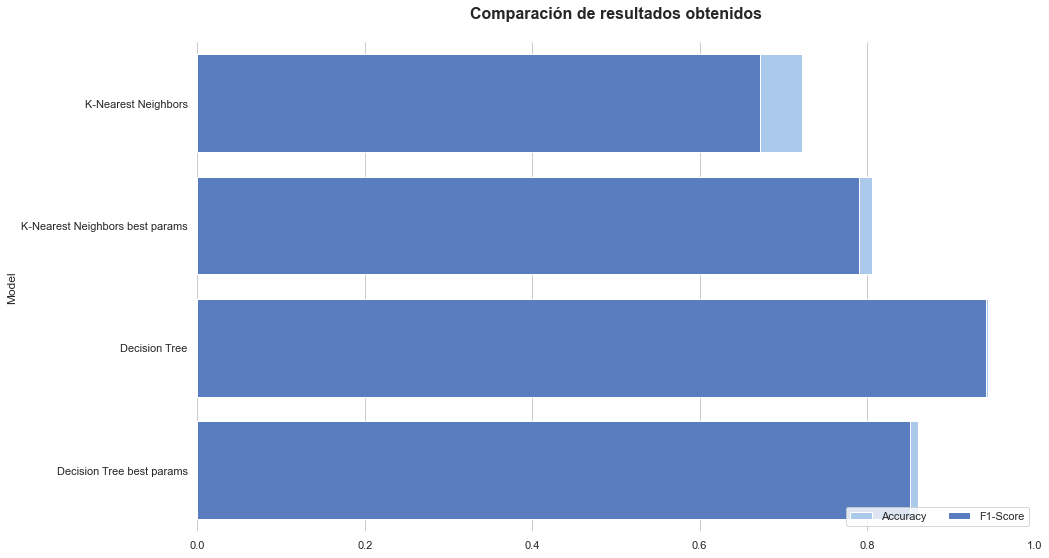

In [39]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))
ax.set_title("Comparación de resultados obtenidos\n", fontsize = 16, fontweight = "bold")

# Plot the models with original data
sns.set_color_codes("pastel")
sns.barplot(x="Accuracy", y="Model", data=metrics_bp,
            label="Accuracy", color="b")

# Plot the models where average number of rooms per dwelling (RM) is not included
sns.set_color_codes("muted")
sns.barplot(x="F1-score", y="Model", data=metrics_bp,
            label="F1-Score", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="Model",
       xlabel="")
sns.despine(left=True, bottom=True)

Basado tanto en *Accuracy* como en *F1-Score*, el mejor modelo es el ***Decision Tree***. No obstante, los resultados al intentar mejorar los parametros del modelo parecen empeorar... A continuación analizaremos que dicen los resultados al comparar su rendimiento con el cross-validation.

## Exercici 4

*Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.*

In [40]:
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
kn_bp = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', weights='distance').fit(X_train,y_train)
dt_bp = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, random_state=42).fit(X_train,y_train)

cv_kn = cross_val_score(kn, X, y, cv=5, scoring='accuracy')
cv_dt = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
cv_kn_bp = cross_val_score(kn_bp, X, y, cv=5, scoring='accuracy')
cv_dt_bp = cross_val_score(dt_bp, X, y, cv=5, scoring='accuracy')

In [41]:
cv_dt_mean = [cv_kn.mean(), cv_kn_bp.mean(), cv_dt.mean(), cv_dt_bp.mean()]
cv_dt_var = [cv_kn.var(), cv_kn_bp.var(), cv_dt.var(), cv_dt_bp.var()]
metrics_bp['CVmean'] = cv_dt_mean
metrics_bp['CVvar'] = cv_dt_var

In [42]:
metrics_bp.head()

,Model,Accuracy,F1-score,CVmean,CVvar
0,K-Nearest Neighbors,0.722222,0.672619,0.691270,0.002379
1,K-Nearest Neighbors best params,0.805556,0.789988,0.725079,0.005097
2,Decision Tree,0.944444,0.942474,0.865397,0.001939
3,Decision Tree best params,0.861111,0.852053,0.910635,0.005330


A priori los resultados por el modelo *Decision Tree* no coinciden al cruzarlos con cross validation, ¿por que? Este hecho no se trata necesariamente de un error, simplemente confirmamos la disparidad de resultados con una mayor varianza entre ellos. 

En un inicio, se puede percibir una ventaja importante del modelo con respecto al modelo *KNN*. El modelo se desempeña bien, seguramente al obtener un test que se ajustaba perfectamente a los resultados esperados, por lo que no fue posible mejorar el modelo al intentar optimizar sus parámetros tanto en *accuracy* como *F1-score*.

Ahora bien, los resultados en esta última tabla nos dan un poco luz y confirman nuestras hipotesis. La *CVmean* aumenta en la mejora del modelo *Decision Tree*, pero a su vez aumenta la varianza.

Ya por último, y con lo mostrado anteriormente, en este punto deberemos considerar que modelo se ajusta mejor a nuestras necesidades. 

In [43]:
cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
cf_matrix_dt_bp = confusion_matrix(y_test, y_pred_dt_bp)

<AxesSubplot:title={'center':'Confusion matrix for dt best params\n'}>

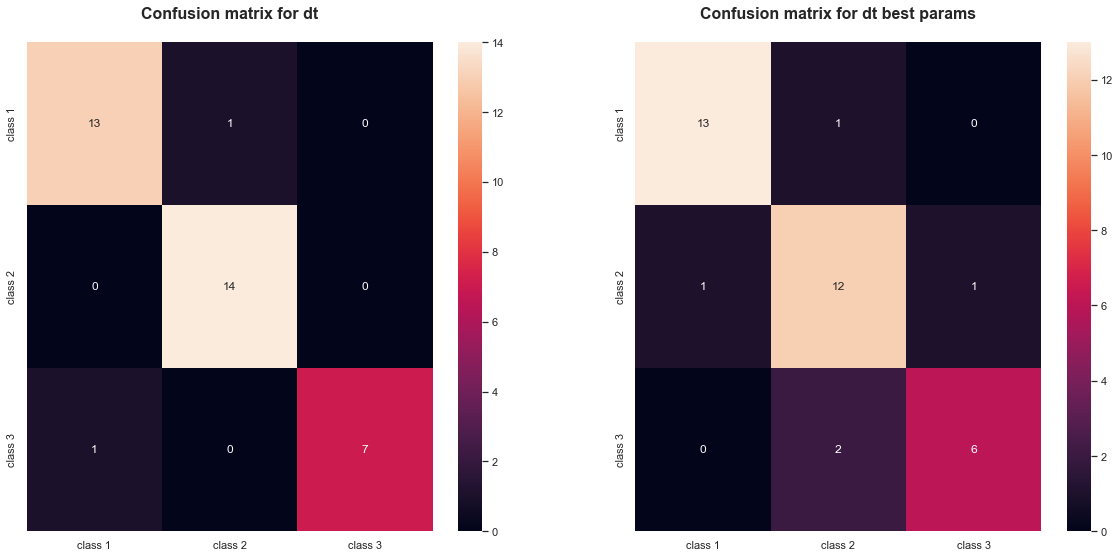

In [44]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))
axes = axes.flat
axes[0].set_title("Confusion matrix for dt\n", fontsize = 16, fontweight = "bold")
sns.heatmap(data=cf_matrix_dt,xticklabels=classes_names, yticklabels=classes_names,annot=True,ax=axes[0])
axes[1].set_title("Confusion matrix for dt best params\n", fontsize = 16, fontweight = "bold")
sns.heatmap(data=cf_matrix_dt_bp,xticklabels=classes_names, yticklabels=classes_names,annot=True,ax=axes[1])

Nota: Los resultadados se ajustan mucho mejor en el modelo inicial

## Exercici 5

*Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)*

### 1. Preprocesado

El primer paso será realizar una exploración del conjunto de datos. Esta revisión nos servirá para evitar errores en el análisis de los datos y en el proceso de modelado.

In [45]:
df.isnull().values.any()

False

In [46]:
df.isna().values.any()

False

No tenemos valores nulos y consideramos que no existen datos anormales.

In [47]:
print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for c in df:
    stat, p = shapiro(df[c])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(c + ' Probably Gaussian\n')
    else:
        print(c + ' Probably NOT Gaussian\n')

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


stat=0.804, p=0.000
Class Probably NOT Gaussian

stat=0.982, p=0.020
Alcohol Probably NOT Gaussian

stat=0.889, p=0.000
Malic acid Probably NOT Gaussian

stat=0.984, p=0.039
Ash Probably NOT Gaussian

stat=0.990, p=0.264
Alcalinity of ash Probably Gaussian

stat=0.938, p=0.000
Magnesium Probably NOT Gaussian

stat=0.977, p=0.004
Total phenols Probably NOT Gaussian

stat=0.955, p=0.000
Flavanoids Probably NOT Gaussian

stat=0.963, p=0.000
Nonflavanoid phenols Probably NOT Gaussian

stat=0.981, p=0.014
Proanthocyanins Probably NOT Gaussian

stat=0.940, p=0.000
Color intensity Probably NOT Gaussian

stat=0.981, p=0.017
Hue Probably NOT Gaussian

stat=0.945, p=0.000
OD280/OD315 of diluted wines Probably NOT Gaussian

stat=0.931, p=0.000
Proline Probably NOT Gaussian



Como vemos en los resultados, la distribución de **Alcalinity of ash** es normal, por lo tanto aplicaremos la estandarización.

En el resto se descarta la hipótesis nula ya que en el conjunto de datos no se presenta ninguna distribución normal y, por lo tanto, no podemos aplicar la estandarización en los datos.

Procesos de ingenieria a aplicar en el resto de variables:

* Las variables **Alcohol**, **Total phenols**, **Flavanoids**, **Nonflavanoid phenols**, **OD280/OD315**, **Proline** *NO* tienen una distribución normal, utilizaremos la ***normalización***. 
* Las variables **Malic acid**, **Ash**, **Magnesium**, **Proanthocyanins**, **Color intensity**, **Hue** tienen *outliers*, por lo tanto se hará ***RobustScaler***.  

In [48]:
#StandardScaler para la estandarización
standColumns = ['Alcalinity of ash']
scalerStand = preprocessing.StandardScaler().fit(df[standColumns])
df[standColumns] = scalerStand.transform(df[standColumns])

#MinMaxScaler para la normalización
normColumns = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','OD280/OD315 of diluted wines','Proline']
scalerNorm = preprocessing.MinMaxScaler().fit(df[normColumns])
df[normColumns] = scalerNorm.transform(df[normColumns])

#RobustScaler para las variables con outliers
robColumns = ['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']
robustScaler = preprocessing.RobustScaler().fit(df[robColumns])
df[robColumns] = robustScaler.transform(df[robColumns])


In [49]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

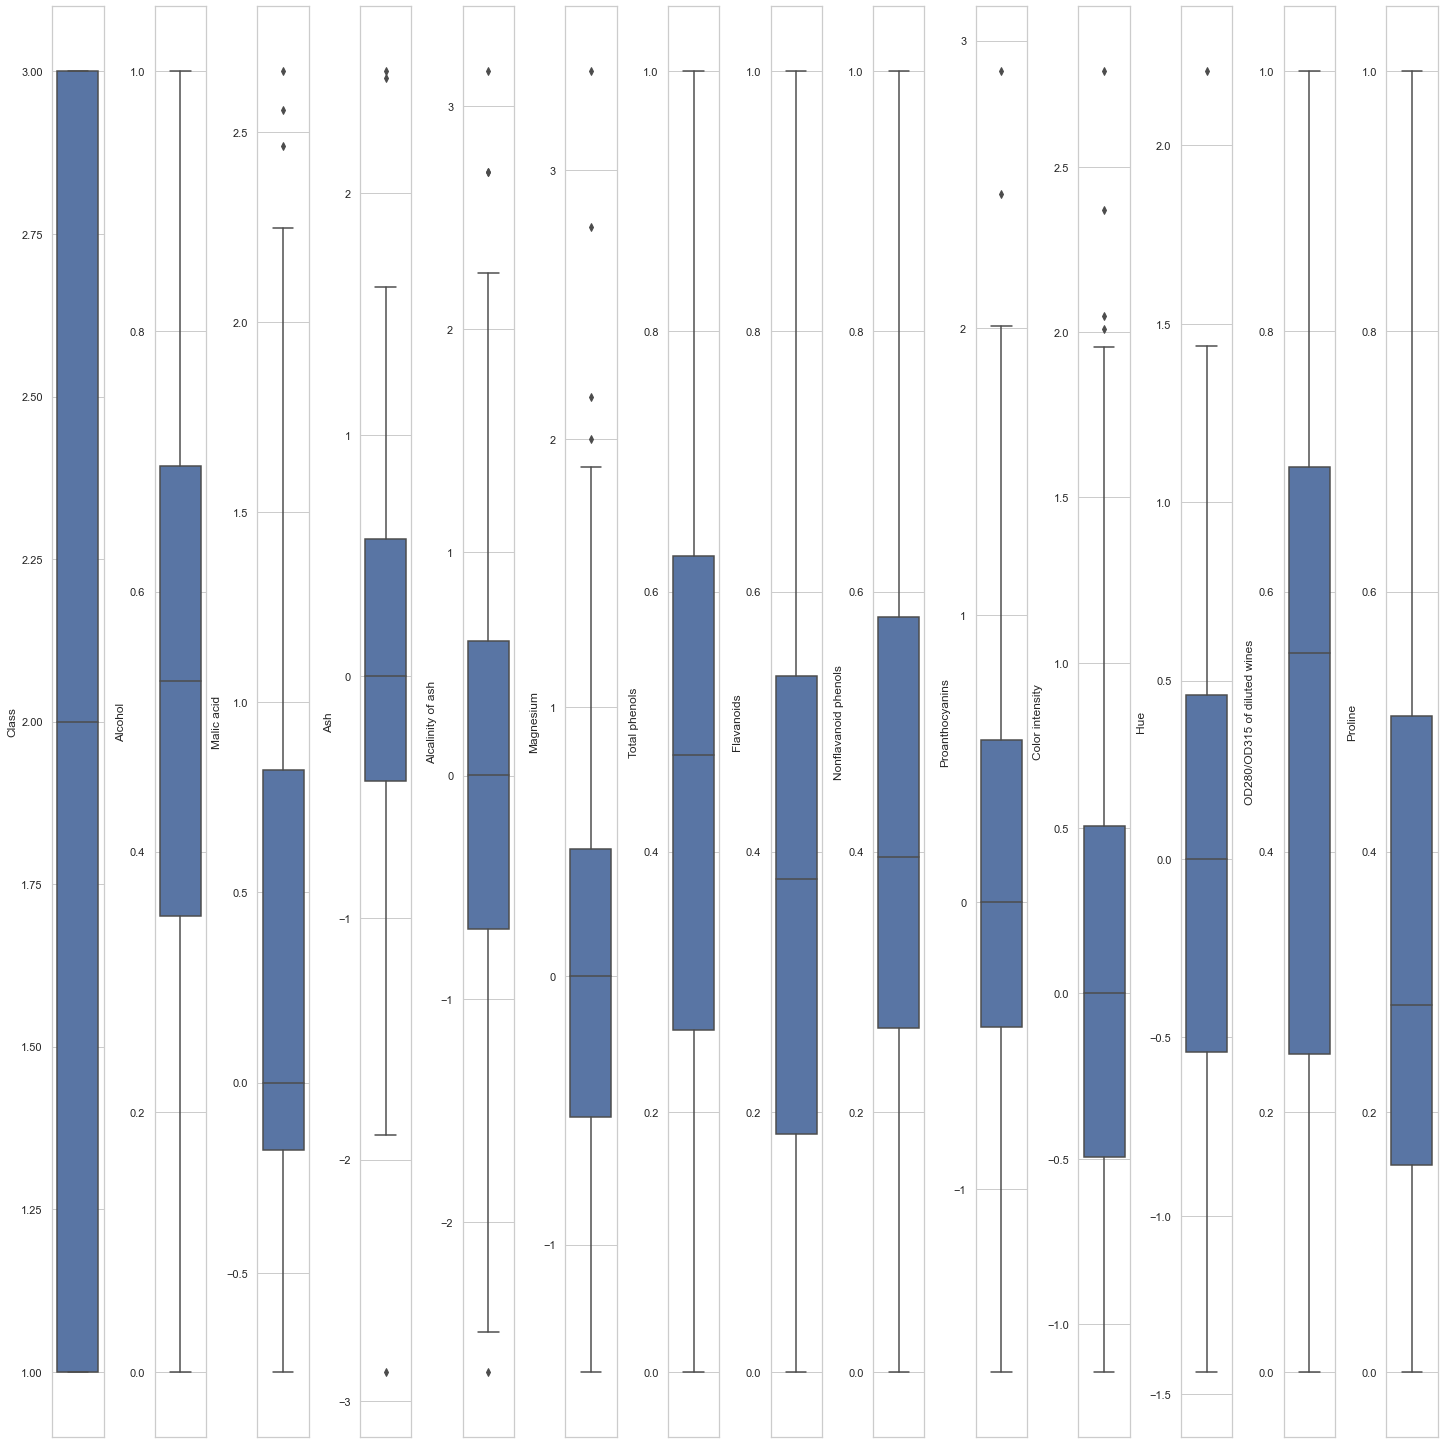

In [50]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 2. Test/Train

Procedemos con la división del conjunto de la siguiente manera: 80% Train y 20% Test.

In [51]:
# split into inputs and outputs
X_pp = df.drop(['Class'], axis=1) #features
y = df['Class'] #target

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_pp, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


### 3. Modelo

En este segundo bloque he decidido cambiar el modelo *Decision Tree* por *Random Forest*, dada la variabilidad de resultados.

#### 3.1. Modelo de clasificación: K-Nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred_kn = kn.predict(X_test)
y_pred_kn[0:5]

array([1, 3, 3, 1, 2], dtype=int64)

#### 3.2. Modelo de clasificación: Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Create Decision Tree classifer object
rf = RandomForestClassifier(random_state=42)

# Train Decision Tree Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = rf.predict(X_test)
y_pred_rf[0:5]

array([1, 1, 3, 1, 2], dtype=int64)

#### 3.3. Análisis comparativo de resultados

In [56]:
data1 = {'test': y_test,
         'kn': y_pred_kn,
         'rf': y_pred_rf,
        }

plotdata = pd.DataFrame(data1)
plotdata.describe().round(1)

,test,kn,rf
count,36.0,36.0,36.0
mean,1.8,1.9,1.8
std,0.8,0.8,0.8
min,1.0,1.0,1.0
25%,1.0,1.0,1.0
50%,2.0,2.0,2.0
75%,2.0,3.0,2.0
max,3.0,3.0,3.0


### 4. Evaluación

In [57]:
# calculate accuracy
from sklearn import metrics
acc_rf_pp = metrics.accuracy_score(y_test, y_pred_rf)
acc_kn_pp = metrics.accuracy_score(y_test, y_pred_kn)

In [58]:
from sklearn.metrics import f1_score
f1_kn_pp = f1_score(y_test, y_pred_kn, average='macro')
f1_rf_pp = f1_score(y_test, y_pred_rf, average='macro')

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
cf_matrix_kn = confusion_matrix(y_test, y_pred_kn)

In [60]:
metrics_pp = pd.DataFrame(data = [('K-Nearest Neighbors', acc_kn_pp, f1_kn_pp), 
                              ('Random Forest', acc_rf_pp, f1_rf_pp)],
                             columns = ['Model', 'Accuracy', 'F1-score'])

metrics_pp

,Model,Accuracy,F1-score
0,K-Nearest Neighbors,0.861111,0.864062
1,Random Forest,1.000000,1.000000


<AxesSubplot:title={'center':'Confusion matrix for kn\n'}>

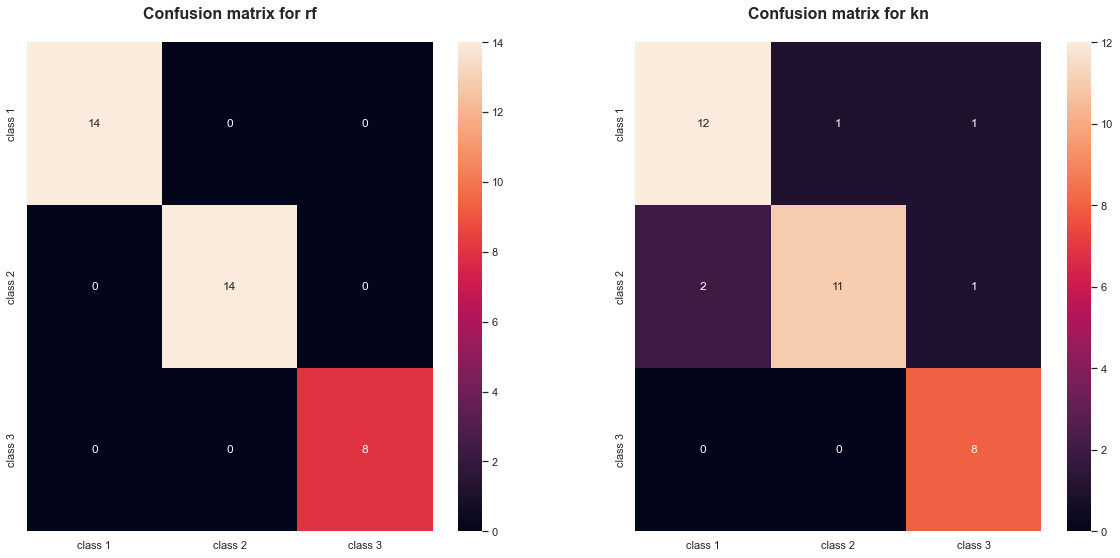

In [61]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))
axes = axes.flat
axes[0].set_title("Confusion matrix for rf\n", fontsize = 16, fontweight = "bold")
sns.heatmap(data=cf_matrix_rf,xticklabels=classes_names, yticklabels=classes_names,annot=True,ax=axes[0])
axes[1].set_title("Confusion matrix for kn\n", fontsize = 16, fontweight = "bold")
sns.heatmap(data=cf_matrix_kn,xticklabels=classes_names, yticklabels=classes_names,annot=True,ax=axes[1])

Los resultados parecen óptimos, excelentes en el modelo *Random Forest* obteniendo un 100%.

### 5. Cross validation

In [62]:
cv_kn_pp = cross_val_score(kn, X_pp, y, cv=5, scoring='accuracy')
cv_rf_pp = cross_val_score(rf, X_pp, y, cv=5, scoring='accuracy')

In [63]:
cv_rf_mean = [cv_kn_pp.mean(), cv_rf_pp.mean()]
cv_rf_var = [cv_kn_pp.var(), cv_rf_pp.var()]
metrics_pp['CVmean'] = cv_rf_mean
metrics_pp['CVvar'] = cv_rf_var

In [64]:
metrics_pp

,Model,Accuracy,F1-score,CVmean,CVvar
0,K-Nearest Neighbors,0.861111,0.864062,0.882063,0.000112
1,Random Forest,1.000000,1.000000,0.977778,0.000432


Confirmamos los buenos resultados con *CV*

### 6. Mejora parámetros en los modelos

#### 6.1.1. Mejora parámetros en modelos: K-Nearest Neighbors

In [65]:
kn = KNeighborsClassifier()

param = {'n_neighbors': [3,5,10],'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute') , 'weights': ('uniform', 'distance')},
rsearch = RandomizedSearchCV(estimator=kn,
                             param_distributions=param, cv=5,
                             n_iter=10, random_state=42, scoring='f1_macro')
rsearch.fit(X_pp, y)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.9230527234722505
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'kd_tree'}


In [66]:
kn_bp = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', weights='distance').fit(X_train,y_train)

#Predict the response for test dataset
y_pred_kn_bp = kn_bp.predict(X_test)

In [67]:
from sklearn import metrics
acc_kn2_pp = metrics.accuracy_score(y_test, y_pred_kn_bp)
f1_kn2_pp = f1_score(y_test, y_pred_kn_bp, average='macro')
cv_kn2 = cross_val_score(kn_bp, X_pp, y, cv=5, scoring='accuracy')

#### 6.3. Evaluación resultados de los modelos mejorados

In [69]:
metrics_pp_bp = pd.DataFrame( data = [('K-Nearest Neighbors best params', acc_kn2_pp, f1_kn2_pp, cv_kn2.mean(), cv_kn2.var())],
                             columns = ['Model', 'Accuracy', 'F1-score','CVmean','CVvar'])

metrics_pp_bp = pd.concat([metrics_pp, metrics_pp_bp], ignore_index=True)

In [70]:
metrics_pp_bp.sort_values("Model")

,Model,Accuracy,F1-score,CVmean,CVvar
0,K-Nearest Neighbors,0.861111,0.864062,0.882063,0.000112
2,K-Nearest Neighbors best params,0.888889,0.884690,0.921270,0.000771
1,Random Forest,1.000000,1.000000,0.977778,0.000432


**Nota**: he considerado como óptimos los resultados en el modelo Random Forest.

### 7. Conclusiones

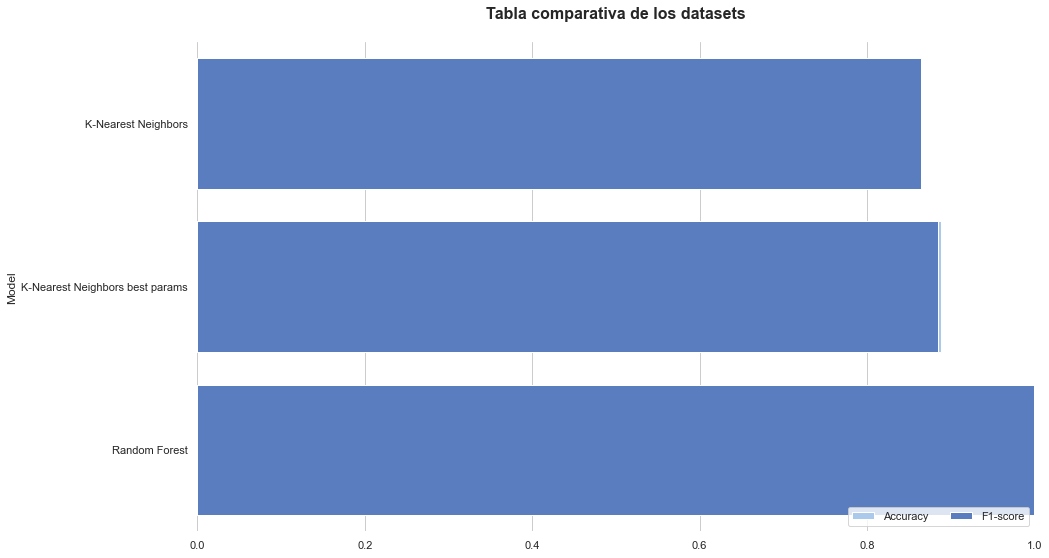

In [74]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))
ax.set_title("Tabla comparativa de los datasets\n", fontsize = 16, fontweight = "bold")

# Plot the models with original data
sns.set_color_codes("pastel")
sns.barplot(x="Accuracy", y="Model", data=metrics_pp_bp.sort_values("Model"),
            label="Accuracy", color="b")

# Plot the models where data has been preprocessed
sns.set_color_codes("muted")
sns.barplot(x="F1-score", y="Model", data=metrics_pp_bp.sort_values("Model"),
            label="F1-score", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="Model",
       xlabel="")
sns.despine(left=True, bottom=True)

Basado tanto en Accuracy como en F1-score, el mejor modelo es el modelo entrenado de Random Forest.